<a href="https://colab.research.google.com/github/seiji0203/Machine-Learning-Models/blob/master/%E9%9D%9E%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 非線形回帰の実装

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import model_selection, preprocessing, linear_model, svm

# データ作成

No handles with labels found to put in legend.


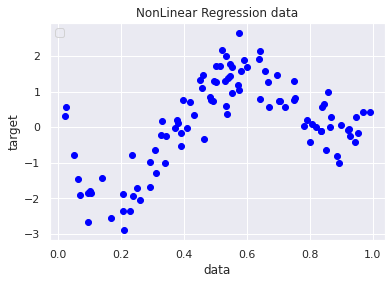

In [78]:
# creat datasets
n=100

def true_func(x):
  z = 1-48*x+218*x**2-315*x**3+145*x**4
  return z
  
# using true func
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# add noise
noise = 0.5 * np.random.randn(n) 
target = target + noise

# see data
plt.scatter(data, target, color='blue')
plt.title('NonLinear Regression data')
plt.ylabel('target')
plt.xlabel('data')
plt.legend(loc=2)
plt.show()

# モデルの作成

## ガウス型基底関数
scikit-learnでガウス型基底関数に非線形変換するには、sklearn.metrics.pairwise.rbf_kernelを利用

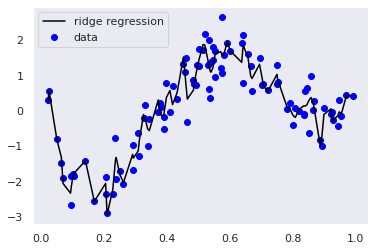

0.9150360856358952


In [79]:
# reshape
data = data.reshape(-1,1)
target = target.reshape(-1,1)

# ガウス型基底関数による非線形変換
kx = rbf_kernel(X=data, Y=data, gamma=500)

# 線形回帰によるパラメータ学習
clf = LinearRegression()
clf.fit(kx, target)

# 学習モデルによる予測結果の算出
p_lin = clf.predict(kx)

# グラフ作成
plt.scatter(data, target,label='data', color='blue')
plt.plot(data, p_lin, color='black', linestyle='-',label='ridge regression')
plt.legend()
plt.grid()
plt.show()

# 決定係数の算出
print(clf.score(kx, target))

過学習が生じている。これは、ガウス型基底関数を用いた非線形回帰モデルの表現力が高すぎたことによると考えられる。

## リッジ回帰（正則化）
scikit-learnでsklearn.linear_model.Ridgeを利用

重みwのL2ノルムの2乗を加えることで正則化

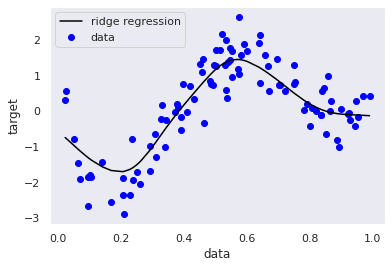

0.8054538437418163


In [80]:
# reshape
kx = rbf_kernel(X=data, Y=data, gamma=100)

#Ridge Regression model
clf = Ridge(alpha=30) 
clf.fit(kx, target)

# predict
p_ridge = clf.predict(kx)

# Visualization
plt.scatter(data, target,label='data', color='blue')
plt.plot(data, p_ridge, color='black', linestyle='-',label='ridge regression')
plt.ylabel('target')
plt.xlabel('data')
plt.legend(loc=2)
plt.grid()
plt.show()

print(clf.score(kx, target))

0.8054538437418163


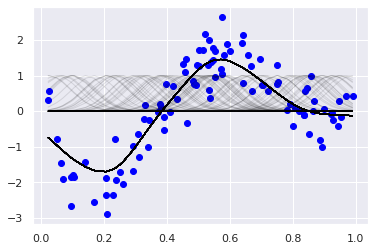

In [83]:
# creat model and train
kx = rbf_kernel(X=data, Y=data, gamma=100)
clf = Ridge(alpha=30)
clf.fit(kx, target)

# predict
p_ridge = clf.predict(kx)

for i in range(len(kx)):
  plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.1)
  plt.plot(data, p_ridge, color='black', linestyle='-', linewidth=1, markersize=3, label='ridge regression')

# Visualization
plt.scatter(data, target, color='blue', label='data')
print(clf.score(kx, target))

## RBF Kernel
ガウス型基底関数とRidge回帰を組み合わせたモデルであるKernelRidgeモデル(L2制約付き最小二乗学習)の実装

sklearn.kernel_ridge.KernelRidge

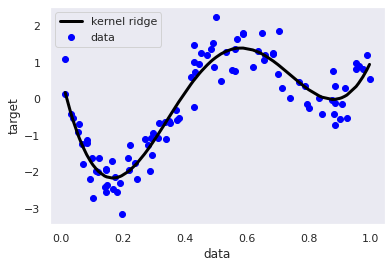

0.8923021479529455


In [28]:
# creat model and train
clf = KernelRidge(alpha=0.0002, kernel='rbf')
data = data.reshape(-1, 1)
target = target.reshape(-1, 1)
clf.fit(data, target)

# predict
p_kridge = clf.predict(data)

# Visualization
plt.scatter(data, target, color='blue', label='data')
plt.plot(data, p_kridge, color='black', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.ylabel('target')
plt.xlabel('data')
plt.legend()
plt.grid()
plt.show()

print(clf.score(data, target))

# Lasso回帰
sklearn.linear_model.Lassoを利用

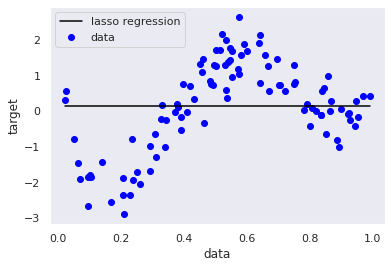

-2.220446049250313e-16


In [110]:
# Lasso Regression model
kx = rbf_kernel(X=data, Y=data, gamma=100)
clf = Lasso(alpha=10000, max_iter=1000)
clf.fit(kx, target)

# predict
p_lasso = clf.predict(kx)

# Visualization
plt.scatter(data, target, color='blue', label='data')
plt.plot(data, p_lasso, color='black', linestyle='-', label='lasso regression')
plt.ylabel('target')
plt.xlabel('data')
plt.legend(loc=2)
plt.grid()
plt.show()

print(clf.score(kx, target))

Lasso回帰では正則化の制約が強く、表現力が失われている

## 多項式カーネル
scikit-learnで多項式関数に変換するには、sklearn.preprocessing.PolynomialFeaturesを利用

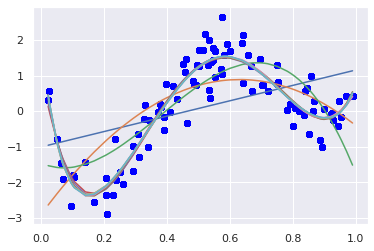

In [111]:
# PolynomialFeatures
deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
  ])
  regr.fit(data, target)
# make predictions
  p_poly = regr.predict(data)
# plot regression result
  plt.scatter(data, target, color='blue', label='data')
  plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

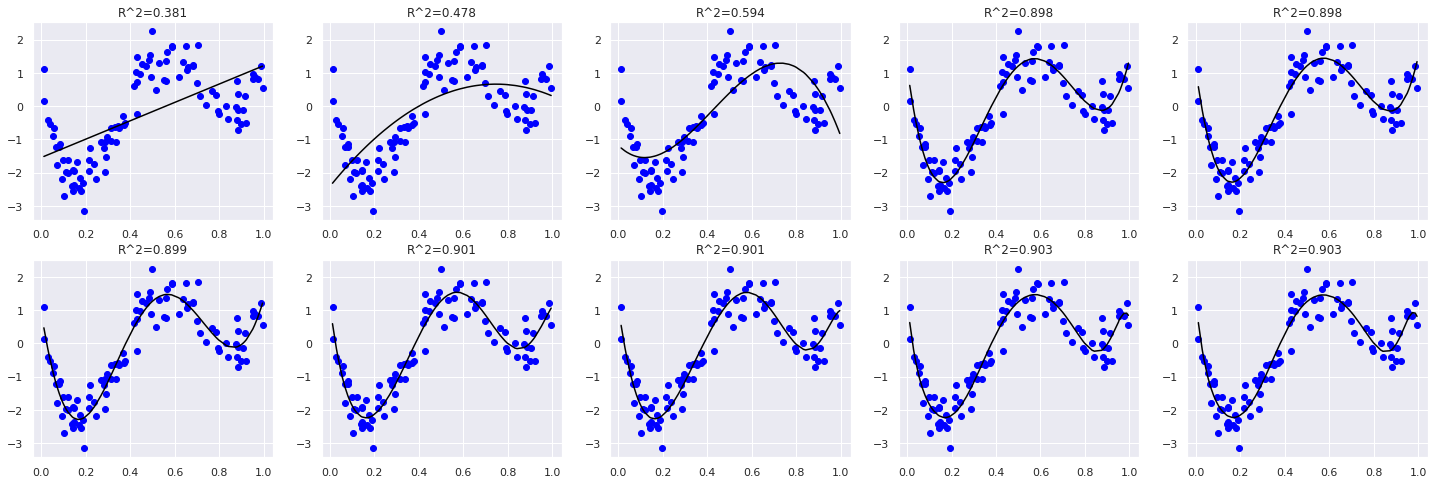

In [23]:
# 次数の数だけグラフを準備(2行5列のサブプロット)
fig, axes = plt.subplots(2, 5, figsize=(25,8))

# 非線形変換とパラメータ学習
for d in deg:
  # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
  # 多項式変換した後、線形回帰モデルでパラメータを学習
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
                   ])

  # train
  regr.fit(data, target)

  # predict
  p_poly = regr.predict(data)

  # グラフ作成(次数の数だけグラフ化)
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target, color='blue')
  axes[i][j].plot(data, p_poly, color='black') # 決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()

# SVR(サポートベクター回帰)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


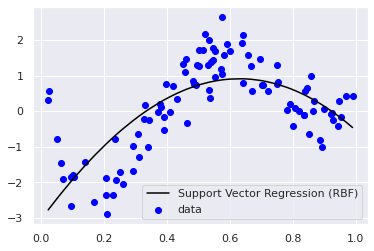

0.5031972335313932


In [115]:
# SVR
# サポートベクター回帰, カーネル:ガウス型基底関数
clf = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1) 
clf.fit(data, target)
p_rbf = clf.fit(data, target).predict(data)

# Visualization
plt.scatter(data, target, color='blue', label='data')
plt.plot(data, p_rbf, color='black', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

print(clf.score(data, target))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


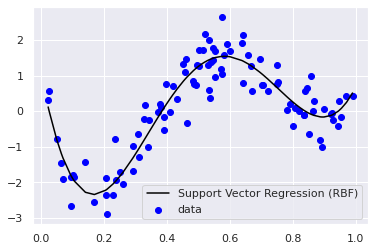

0.8501898421179388


In [119]:
# ハイパーパラメーターの設計
clf = svm.SVR(kernel='rbf', C=1e5, gamma=0.6, epsilon=0.2) # サポートベクター回帰, カーネル:ガウス型基底関数
clf.fit(data, target)
p_rbf = clf.fit(data, target).predict(data)

# Visualization
plt.scatter(data, target, color='blue', label='data')
plt.plot(data, p_rbf, color='black', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

print(clf.score(data, target))